# Regular Expression Matching
Given an input string s and a pattern p, implement regular expression matching with support for '.' and '*' where:

- '.' Matches any single character.​​​​
- '*' Matches zero or more of the preceding element.

The matching should cover the entire input string (not partial).

**Example 1:**

- Input: s = "aa", p = "a"
- Output: false
- Explanation: "a" does not match the entire string "aa".

**Example 2:**

- Input: s = "aa", p = "a*"
- Output: true
- Explanation: '*' means zero or more of the preceding element, 'a'. Therefore, repeating 'a' once, it becomes "aa".

**Example 3:**

- Input: s = "ab", p = ".*"
- Output: true
- Explanation: ".*" means "zero or more (*) of any character (.)".





In [1]:
pip install rstr

In [47]:
import rstr
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
def isMatchDP(s, p):
  # Inisialisasi matrix DP
  dp = [[False] * (len(p) + 1) for _ in range(len(s) + 1)]

  # Kasus ketika kedua string kosong, pasti cocok
  dp[0][0] = True

  # Kasus ketika pola kosong, pasti tidak cocok
  for i in range(1, len(p) + 1):
    if p[i - 1] == '*':
      dp[0][i] = dp[0][i - 2]
  
  for i in range(1, len(s) + 1):
    for j in range(1, len(p) + 1):
      if p[j - 1] == '.' or p[j - 1] == s[i - 1]:
        dp[i][j] = dp[i - 1][j - 1]
      elif p[j - 1] == '*':
        ignore_star = dp[i][j - 2]
        match_star = dp[i - 1][j] and (s[i - 1] == p[j - 2] or p[j - 2] == '.')
        dp[i][j] = ignore_star or match_star
  
  return dp[len(s)][len(p)]

In [3]:
def isMatchBacktracking(s, p):
    def backtrack(i, j):
        if j == len(p):
            return i == len(s)
        next_char_is_star = (j + 1 < len(p) and p[j + 1] == '*')
        if next_char_is_star:
            if backtrack(i, j + 2):
                return True
            while i < len(s) and (s[i] == p[j] or p[j] == '.'):
                i += 1
                if backtrack(i, j + 2):
                    return True
        else:
            if i < len(s) and (s[i] == p[j] or p[j] == '.'):
                return backtrack(i + 1, j + 1)
        return False
    return backtrack(0, 0)

In [43]:
pattern = input("Masukkan pattern anda: ")

listAlp = []
for char in pattern:
  if '.' == char or '*' == char:
    continue
  if char not in listAlp:
    listAlp.append(char)
result = ''.join(listAlp)

listLength = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
listString = []

for panjang in listLength:
  listString.append(rstr.rstr(result, panjang))

In [44]:
listString

['babbbabbba',
 'abbbbbbaabbaaabbbbbb',
 'abbabbbbbaaaabaabbbbaabaabbbbbabaaaaabaa',
 'baaaababbbaabbabbabbabbabbbbbbaaabaaabbbaaaaaababbbabbbabbbbbbaaabbbbaaaaabbbbba',
 'baaaabbbbaaabbababaabaaaaabbbbbaabbaabbbabbaaababaaabbaaababbbbbaabbabbabbbbabbbbbbbabaaabbbabaabaabbbbaaabababbaaabbababaaaaaabbbabaaaababbababbaaaabaaaaabbaab',
 'abbbaabababbbbbbbbaaabaabbbabbbbbbaabbaabbbaabbabbbbaabbaaababaababbaabbabbabaabbbbaabbbbbaaaabbbabaaaababbababbbbaababbaaaabbbaaaaabbabababaabbaabbbaabbaaaabaaabaababbababaaabbbbabaabbbabaabbabaabbbbaabbbaabaabbbbbababbbaabbbabaaaaaabaabaaaabbbbabababaaaabbaaaaaaaaabababababbababababbbabbaaaaabbbabbabbaaababbabababbaa',
 'aaaabaaabbbbbababbaabaaabbbbbabaabbbabbbbaabbbbaaaabaaababbbabbaababaaabbaabbbabaabbabbbbaabaabbaaabababbaabaabbababaabbaaaaaaababbbbabbababbbabbabaaabaaabbabbbbabaabbababbbaaabbbabbbaaabbbbabbabbbbabaaaaabbbbbababaaaabbbbbbaabaaaabbaaaabbaabbabbaaabbbabaaaaabaaaaaaabababababbbbabaaaaaabbbaaaaaaaaababaabbabbaabbbaaaaaaabbbbaaaabaababbaa

In [45]:
timeDP=[]
timeBT=[]

print("Total waktu untuk berbagai input menggunakan pendekatan Dynamic Programming: ")
for string in listString:
  startTime = time.time()
  temp = isMatchDP(string, pattern)
  totaltime = time.time() - startTime
  timeDP.append(totaltime)
  print(f'Waktu eksekusi Panjang String {len(string)}: {totaltime} dengan hasil {temp}')

print("\nTotal waktu untuk berbagai input menggunakan pendekatan Backtracking: ")
for string in listString:
  startTime = time.time()
  temp = isMatchBacktracking(string, pattern)
  totaltime = time.time() - startTime
  timeBT.append(totaltime)
  print(f'Waktu eksekusi Panjang String {len(string)}: {totaltime} dengan hasil {temp}')

Total waktu untuk berbagai input menggunakan pendekatan Dynamic Programming: 
Waktu eksekusi Panjang String 10: 0.0 dengan hasil True
Waktu eksekusi Panjang String 20: 0.0 dengan hasil True
Waktu eksekusi Panjang String 40: 0.001035451889038086 dengan hasil True
Waktu eksekusi Panjang String 80: 0.0010645389556884766 dengan hasil False
Waktu eksekusi Panjang String 160: 0.0016028881072998047 dengan hasil False
Waktu eksekusi Panjang String 320: 0.0032396316528320312 dengan hasil False
Waktu eksekusi Panjang String 640: 0.008488178253173828 dengan hasil False
Waktu eksekusi Panjang String 1280: 0.015857696533203125 dengan hasil False
Waktu eksekusi Panjang String 2560: 0.08840441703796387 dengan hasil False
Waktu eksekusi Panjang String 5120: 0.05089449882507324 dengan hasil False
Waktu eksekusi Panjang String 10240: 0.10929393768310547 dengan hasil False

Total waktu untuk berbagai input menggunakan pendekatan Backtracking: 
Waktu eksekusi Panjang String 10: 0.0 dengan hasil True
Waktu

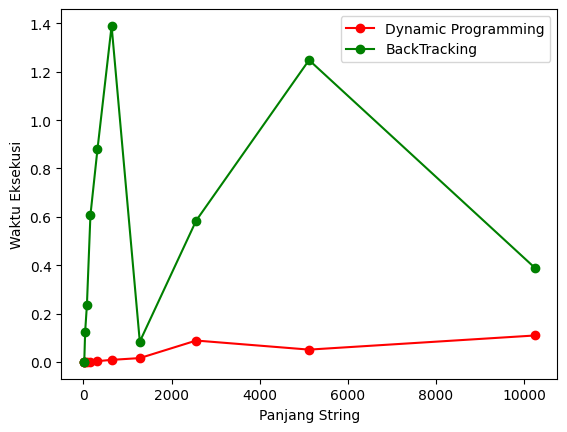

In [48]:
plt.plot(listLength, timeDP, 'o-', color='r', label='Dynamic Programming')
plt.plot(listLength, timeBT, 'o-', color='g', label='BackTracking')
plt.xlabel("Panjang String")
plt.ylabel("Waktu Eksekusi")
plt.legend(loc="best")
plt.show()

In [52]:
data = {
    "List Length": listLength,
    "Dynamic Programming": timeDP,
    "Backtracking": timeBT
}
df = pd.DataFrame(data).transpose()
df.columns = df.iloc[0]
df = df[1:]
df


List Length,10.0,20.0,40.0,80.0,160.0,320.0,640.0,1280.0,2560.0,5120.0,10240.0
Dynamic Programming,0.0,0.0,0.001035,0.001065,0.001603,0.003240,0.008488,0.015858,0.088404,0.050894,0.109294
Backtracking,0.0,0.0,0.124893,0.235224,0.607136,0.880068,1.389579,0.083841,0.584790,1.248333,0.389665
